In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)


In [3]:
# Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Accuracy and evaluation
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9766081871345029
Confusion Matrix (Linear):
 [[ 61   2]
 [  2 106]]

Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [4]:
# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy and evaluation
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix (RBF):\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9707602339181286
Confusion Matrix (RBF):
 [[ 61   2]
 [  3 105]]

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [5]:
# Cross-validation
cv_linear = cross_val_score(svm_linear, X_scaled, y, cv=5).mean()
cv_rbf = cross_val_score(svm_rbf, X_scaled, y, cv=5).mean()

print(f"Linear SVM Cross-Validation Accuracy: {cv_linear:.4f}")
print(f"RBF SVM Cross-Validation Accuracy: {cv_rbf:.4f}")


Linear SVM Cross-Validation Accuracy: 0.9701
RBF SVM Cross-Validation Accuracy: 0.9736


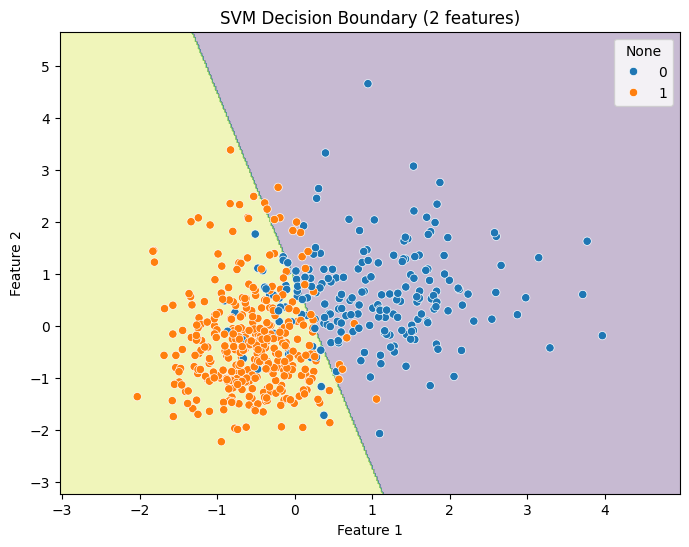

In [6]:
# Use only first 2 features
X_2d = X_scaled[:, :2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)

svm_2d = SVC(kernel='linear')  # or 'rbf'
svm_2d.fit(X2_train, y2_train)

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y)
plt.title("SVM Decision Boundary (2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
